In [5]:
!pip install --upgrade opencv-python-headless numpy pandas matplotlib scikit-image


  Using cached numpy-2.4.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (6.6 kB)


In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
pkdarabi_medical_image_dataset_brain_tumor_detection_path = kagglehub.dataset_download('pkdarabi/medical-image-dataset-brain-tumor-detection')

print('Data source import complete.')


Using Colab cache for faster access to the 'medical-image-dataset-brain-tumor-detection' dataset.
Data source import complete.


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images/328_jpg.rf.e112bca7b6e847a90c45d5ba5111f9cc.jpg
/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images/524_jpg.rf.cafc801ac6d1b49b4c35b33074b85335.jpg
/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images/1354_jpg.rf.1ec183576cc1297a2756ec2cd6f5c90e.jpg
/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images/2660_jpg.rf.2cc843067afd6428671a209c5d316eac.jpg
/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images/874_jpg.rf.80140bd05806e2ee32ad079071f08519.jpg
/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images/2539_jpg.rf.6d66d2c77ea12e0a474fc5177064728b.jpg
/kaggle/input/medical-image-dat

In [8]:
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn  as sns


DATA_TRAIN = '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train'
DATA_TEST = '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test'

In [9]:
all_images = []
all_labels = []

for folder in os.listdir(DATA_TRAIN):
  folder_path = os.path.join(DATA_TRAIN, folder)
  if folder == 'images':
    image_filenames = os.listdir(folder_path)
    for image_file in image_filenames:
      img = cv2.imread(os.path.join(folder_path, image_file))
      all_images.append(img)
  if folder == 'labels':
    label_filenames = os.listdir(folder_path)
    for label_file in label_filenames:
      with open(os.path.join(folder_path, label_file),'r') as f:
        label_content = f.read()
        class_img = label_content.split()[0]
      all_labels.append(class_img)

THE NUMBER OF IMAGES :  2144
THE CLASSES ARE : {'0', '2', '1'}



 THE CLASS OF IMAGE :0


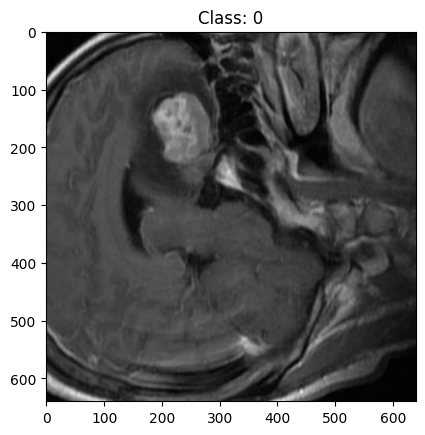


 THE CLASS OF IMAGE :1


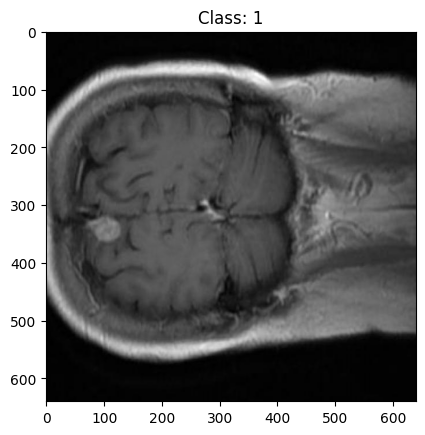


 THE CLASS OF IMAGE :1


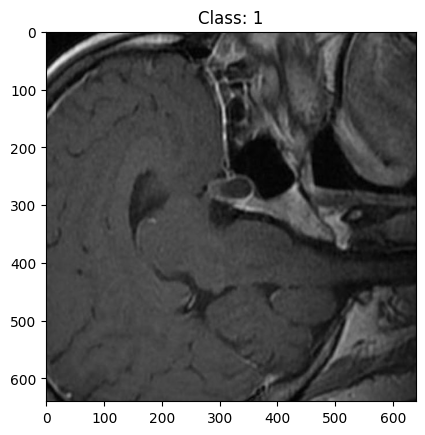

In [10]:
print("THE NUMBER OF IMAGES : ",len(all_images))
print("THE CLASSES ARE :",set(all_labels))
print("\n")

comp = 0
for lb, img in zip(all_labels,all_images):
  if comp >= 3:
    break
  print(f"\n THE CLASS OF IMAGE :{lb}")
  converted_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(converted_img)
  plt.title(f"Class: {lb}")
  plt.show()
  comp += 1

In [11]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


In [12]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

data_yaml = {
    'path': '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/',
    'train': 'train',
    'test': 'test',
    'val': 'valid',
    'classes': ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    'nc': 4,
}

file_path = 'data.yaml'
with open(file_path,'w') as f:
  f.write(str(data_yaml))

detector = model.train(data=file_path, epochs=10, imgsz=640)

Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train15, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T


0: 640x640 1 class_1, 6.0ms
Speed: 1.8ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


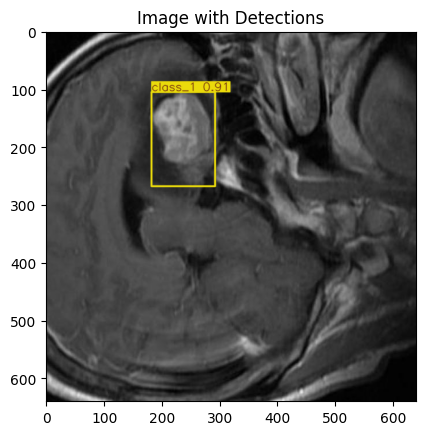

In [13]:
for original_img in all_images:
  rgb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
  results = model(rgb_img)


  annotated_img = results[0].plot()

  plt.imshow(annotated_img)
  plt.title("Image with Detections")
  plt.show()
  break # Only show the first image for demonstration

In [14]:
def yolov8(image_array):
    rgb_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    results = model(rgb_image, verbose=False)

    if len(results) > 0 and results[0].boxes:
        detections = results[0].boxes.data.cpu().numpy()
        return detections
    else:
        return np.array([])

In [15]:


def features_extraction(images):
  '''
  this function will extract the features from the images
  these features will be used to train the model using DecisionTreeClassifier
  the features are :
  1. tumor area
  2. tumor perimetre
  3. tumor diagonal
  4. mean intensity
  5. std intensity
  6. min intensity
  7. max intensity
  8. aspect ratio
  9. fill ratio
  10. compactness
  11. x center
  12. y center
  13. x center norm
  14. y center norm
  15. brain side (left or right)
  16. risk (low or high)
  17. class id
  '''
  all_extracted_features = []
  for original_img in images:

            detections = yolov8(original_img)

            if detections.size == 0:
                print("No tumors detected in this image. Skipping feature extraction for this image.")
                continue

            # Iterate over each detected object in the image
            for det in detections:
                # Unpack individual detection parameters: [x1, y1, x2, y2, confidence, class_id]
                x1, y1, x2, y2, conf, cls_id = det

                confidence = float(conf)
                class_id = int(cls_id)


                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)


                img_height, img_width, _ = original_img.shape
                x1 = max(0, x1)
                y1 = max(0, y1)
                x2 = min(img_width, x2)
                y2 = min(img_height, y2)

                # Check if ROI is valid (at least 2x2 pixels for GLCM and avoid empty region)
                if x2 <= x1 or y2 <= y1 or (x2 - x1) < 2 or (y2 - y1) < 2:
                    print(f"Invalid ROI for detection (class_id: {class_id}, confidence: {confidence:.2f}). Skipping feature extraction for this detection.")
                    continue

                roi = original_img[y1:y2, x1:x2]
                # Ensure ROI is not empty before converting to grayscale
                if roi.size == 0:
                    print(f"Empty ROI after clipping for detection (class_id: {class_id}, confidence: {confidence:.2f}). Skipping feature extraction.")
                    continue

                gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                # Ensure the grayscale image is not empty before thresholding
                if gray.size == 0:
                    print(f"Empty grayscale ROI for detection (class_id: {class_id}, confidence: {confidence:.2f}). Skipping feature extraction.")
                    continue

                ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                tumor_area = np.sum(thresh == 255)

                width = x2 - x1
                height = y2 - y1
                tumor_perimetre = 2 * (width + height)
                tumor_diagonal = np.sqrt(width**2 + height**2)

                mean_intensity = np.mean(thresh)
                std_intensity = np.std(thresh)
                min_intensity = np.min(thresh)
                max_intensity = np.max(thresh)

                aspect_ratio = width / float(height) if height != 0 else 0
                fill_ratio = tumor_area / float(width * height) if (width * height) != 0 else 0

                compactness = tumor_perimetre**2 / float(tumor_area * 4 * np.pi) if tumor_area != 0 else 0

                x_center = x1 + width / 2
                y_center = y1 + height / 2
                x_center_norm = x_center / float(img_width) if img_width != 0 else 0
                y_center_norm = y_center / float(img_height) if img_height != 0 else 0

                brain_side = 0 if x_center_norm < 0.5 else 1 # 0 --> left , 1 -->right
                risk = 0 if confidence < 0.5 else 1 # 0 --> low , 1 --> high

                features = {
                    'tumor_area': tumor_area,
                    'tumor_perimetre': tumor_perimetre,
                    'tumor_diagonal': tumor_diagonal,
                    'mean_intensity': mean_intensity,
                    'std_intensity': std_intensity,
                    'min_intensity': min_intensity,
                    'max_intensity': max_intensity,
                    'aspect_ratio': aspect_ratio,
                    'fill_ratio': fill_ratio,
                    'compactness': compactness,
                    'brain_side': brain_side,
                    'risk': risk,
                    'class_id': class_id
                }
                all_extracted_features.append(features)
  return all_extracted_features

In [16]:
df = pd.DataFrame(features_extraction(all_images))
df.head()

No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction for this image.
No tumors detected in this image. Skipping feature extraction fo

,tumor_area,tumor_perimetre,tumor_diagonal,mean_intensity,std_intensity,min_intensity,max_intensity,aspect_ratio,fill_ratio,compactness,brain_side,risk,class_id
0,9137,546,196.644349,129.946180,127.476532,0,255,0.674847,0.509593,2.596401,0,1,1
1,1733,210,74.813100,162.827929,122.507908,0,255,1.282609,0.638541,2.025024,0,1,1
2,1684,274,99.322706,96.455526,123.662810,0,255,1.584906,0.378257,3.547719,0,1,2
3,1274,220,79.056942,111.066667,126.436528,0,255,0.692308,0.435556,3.023194,1,1,0
4,4541,474,169.838158,84.757356,120.122090,0,255,0.717391,0.332382,3.937271,0,1,0


In [60]:
df['class_id'].value_counts()

,count
class_id,
0,1058
2,720
1,537


In [63]:
from sklearn.utils import resample
import pandas as pd

class_id_1 = df[df['class_id']==1]
class_id_0 = df[df['class_id']==0]
class_id_2 = df[df['class_id']==2]


target_samples = len(class_id_0)


class_id_min_upsampled_1 = pd.DataFrame(columns=class_id_1.columns)
class_id_min_upsampled_2 = pd.DataFrame(columns=class_id_2.columns)


if not class_id_1.empty:
    class_id_min_upsampled_1 = resample(class_id_1,
                                        replace=True,
                                        n_samples=target_samples,
                                        random_state=27)
else:
    print("Warning: class_id_1 is empty, cannot resample.")


if not class_id_2.empty:
    class_id_min_upsampled_2 = resample(class_id_2,
                                        replace=True,
                                        n_samples=target_samples,
                                        random_state=27)
else:
    print("Warning: class_id_2 is empty, cannot resample.")

df = pd.concat([class_id_0, class_id_min_upsampled_1, class_id_min_upsampled_2])
df['class_id'].value_counts()

/tmp/ipython-input-3213852417.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([class_id_0, class_id_min_upsampled_1, class_id_min_upsampled_2])


,count
class_id,
0,1058
1,1058


In [70]:

X = df.drop(['class_id','risk'], axis=1)
y = df['class_id'].astype(int)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Axes: >

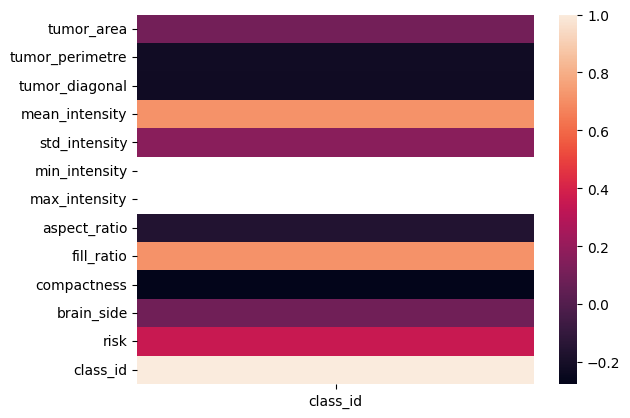

In [72]:
sns.heatmap(df.corr()[['class_id']])


In [73]:
x_train , x_test , y_train , y_test = train_test_split(X_scaled,y , test_size=0.2,random_state=42,stratify=y)

In [74]:
!pip install xgboost
from xgboost import XGBClassifier



model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [75]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9174528301886793


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       212
           1       0.88      0.96      0.92       212

    accuracy                           0.92       424
   macro avg       0.92      0.92      0.92       424
weighted avg       0.92      0.92      0.92       424

